In [1]:
## 데이터 생성
set.seed(1234)
x1 = rnorm(400, 0, 1)
x2 = rnorm(400, 0, 1)
x3 = 2 * x1 + rnorm(400, 1, 1)
e = rnorm(400, 0, 1)

[1] -0.03764792

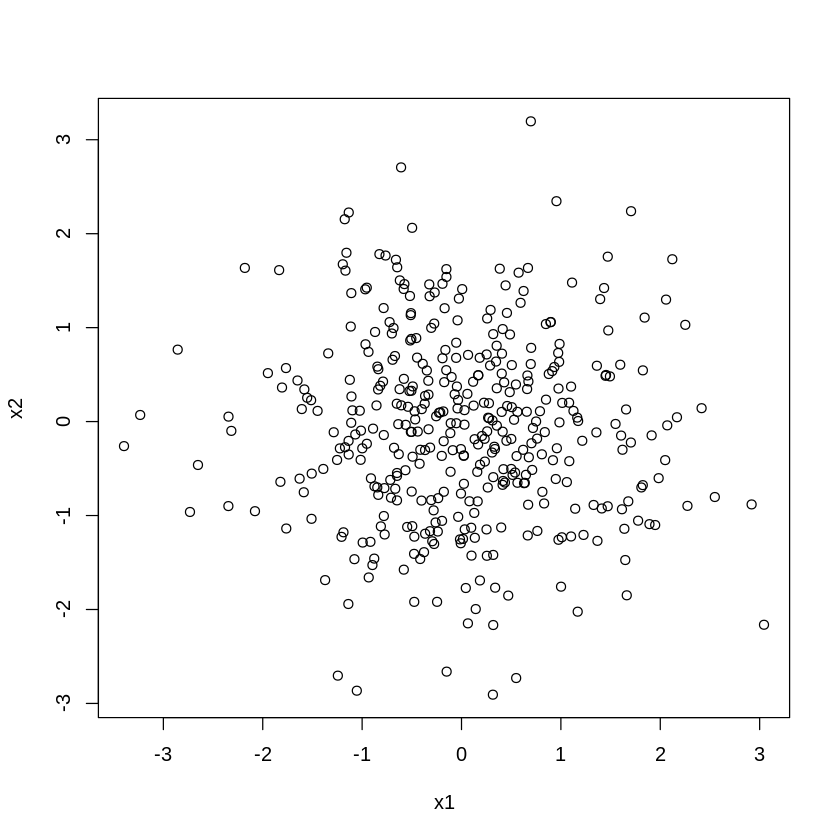

In [2]:
cor(x1, x2)
plot(x1, x2)

[1] 0.8969753

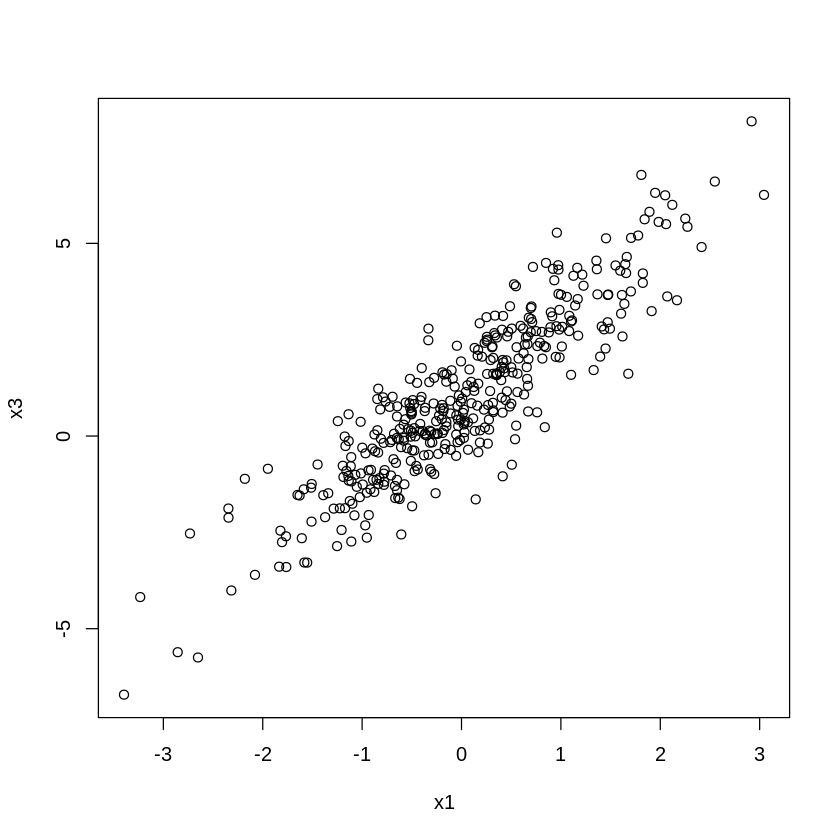

In [3]:
cor(x1, x3)
plot(x1, x3)

In [4]:
## RSS matrix function
RSS = function(model){
  b1 = model$coefficients[2]
  b1 = seq(b1 - 3, b1 + 3, length.out = 100)
  b2 = model$coefficients[3]
  b2 = seq(b2 - 3, b2+ 3, length.out = 100)

  rss = c()

  for (i in b1){
    for (j in b2){
      pred = model$coefficients[1] + i * model$model[, 2] + j * model$model[, 3]

      if (length(model$coefficients) == 4){
        pred = model$coefficients[1] + i * model$model[, 2] + j * model$model[, 3] +
          model$coefficients[4] * model$model[, 2] * model$model[, 3]
      }
      tmp.rss = sum((y - pred)^2) / 100
      rss = c(rss, tmp.rss)
    }
    rss = matrix(rss, ncol = 100, nrow = 100, byrow = T)
    return(rss)
  }
}

In [5]:
## 두 변수가 독립일 때 SSE[linear model1(x1, x2)]
## 모집단 가정
y = 2 * x1 + 4 * x2 + e
lm.12 = lm(y ~ x1 + x2)
summary(lm.12)

b1.12 = lm.12$coefficients[2]
b1.12 = seq(b1.12-3, b1.12+3, length.out = 100)
b2.12 = lm.12$coefficients[3]
b2.12 = seq(b2.12-3, b2.12+3, length.out = 100)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.70399 -0.63417  0.03405  0.63565  3.03943 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.04780    0.04757   1.005    0.316    
x1           2.04788    0.04688  43.687   <2e-16 ***
x2           4.05497    0.04813  84.251   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9495 on 397 degrees of freedom
Multiple R-squared:  0.9566,	Adjusted R-squared:  0.9563 
F-statistic:  4371 on 2 and 397 DF,  p-value: < 2.2e-16


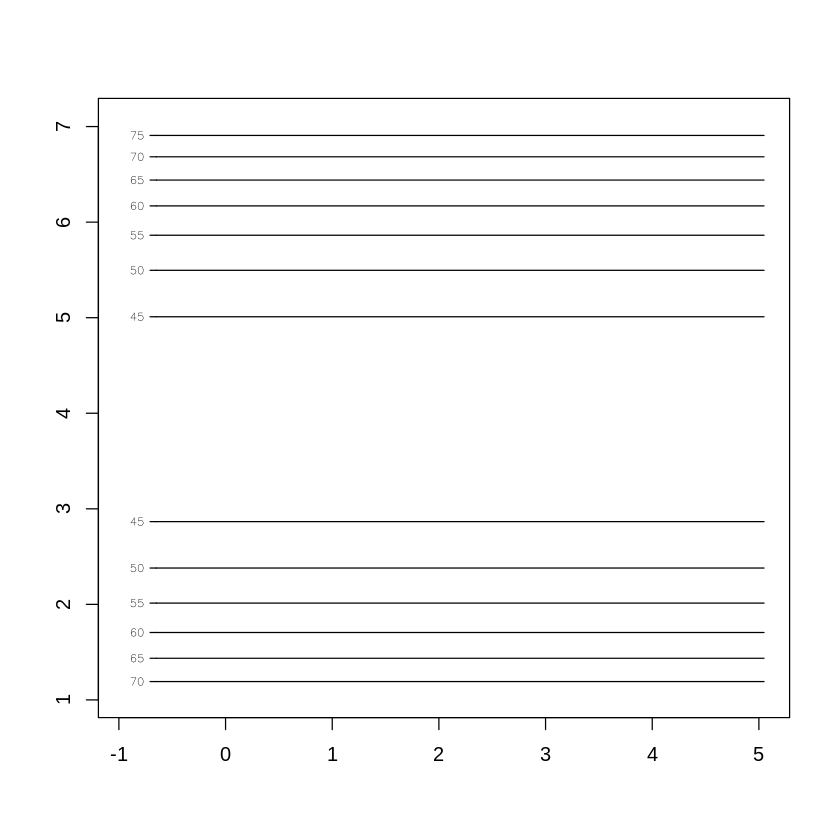

In [6]:
contour(b1.12, b2.12, RSS(lm.12))

In [7]:
## 두 변수가 독립이 아닐 때 SSE[linear model1(x1, x3)]
## 모집단 가정
y = 2 * x1 + 4 * x3 + e
lm.13 = lm(y ~ x1 + x3)
summary(lm.13)

b1.13 = lm.13$coefficients[2]
b1.13 = seq(b1.13-5, b1.13+5, length.out = 100)
b2.13 = lm.13$coefficients[3]
b2.13 = seq(b2.13-5, b2.13+5, length.out = 100)


Call:
lm(formula = y ~ x1 + x3)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.78486 -0.66053  0.03693  0.64638  2.93061 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.08015    0.06746   1.188    0.235    
x1           2.11687    0.10606  19.959   <2e-16 ***
x3           3.96298    0.04960  79.892   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9503 on 397 degrees of freedom
Multiple R-squared:  0.992,	Adjusted R-squared:  0.992 
F-statistic: 2.467e+04 on 2 and 397 DF,  p-value: < 2.2e-16


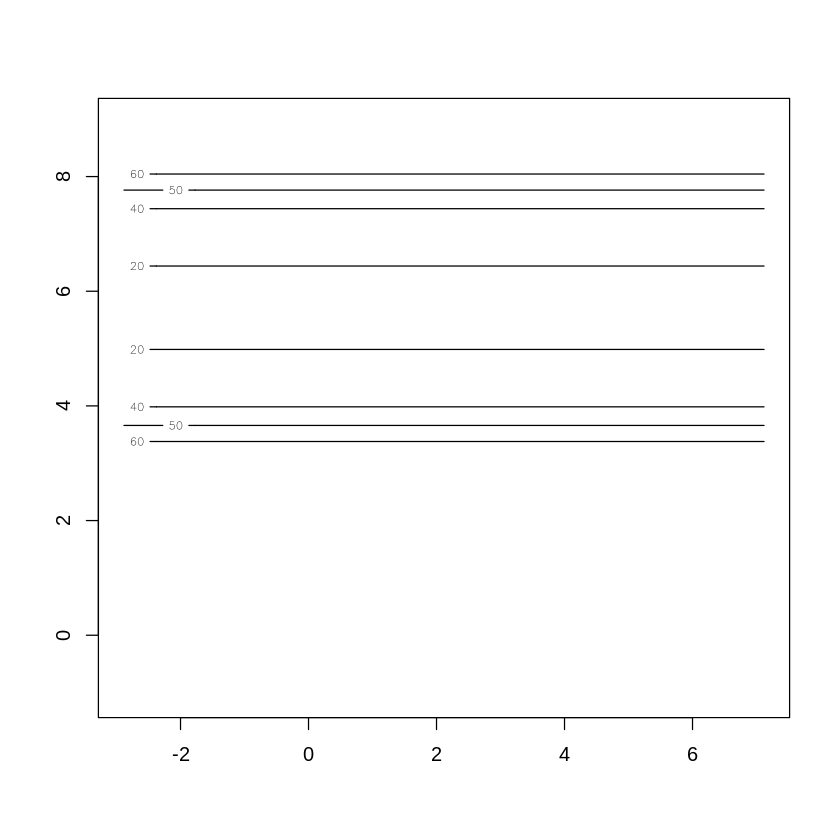

In [8]:
contour(b1.13, b2.13, RSS(lm.13), levels = c(20, 40, 50, 60))

In [9]:
## 두 변수가 독립일 때 SSE[linear model1(x1, x2, 교호효과)]
## 모집단 가정(교호효과 o)
y = 2 * x1 + 4 * x2 + 3 * x1 * x2 + e
lm.1212 = lm(y ~ x1 + x2 + x1 * x2)
summary(lm.1212)

b1.1212 = lm.1212$coefficients[2]
b1.1212 = seq(b1.1212-3, b1.1212+3, length.out = 100)
b2.1212 = lm.1212$coefficients[3]
b2.1212 = seq(b2.1212-3, b2.1212+3, length.out = 100)


Call:
lm(formula = y ~ x1 + x2 + x1 * x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.73263 -0.64696  0.02512  0.63889  3.06335 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.04565    0.04757    0.96    0.338    
x1           2.04105    0.04719   43.25   <2e-16 ***
x2           4.05489    0.04810   84.30   <2e-16 ***
x1:x2        2.94223    0.04802   61.28   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9489 on 396 degrees of freedom
Multiple R-squared:  0.9679,	Adjusted R-squared:  0.9676 
F-statistic:  3979 on 3 and 396 DF,  p-value: < 2.2e-16


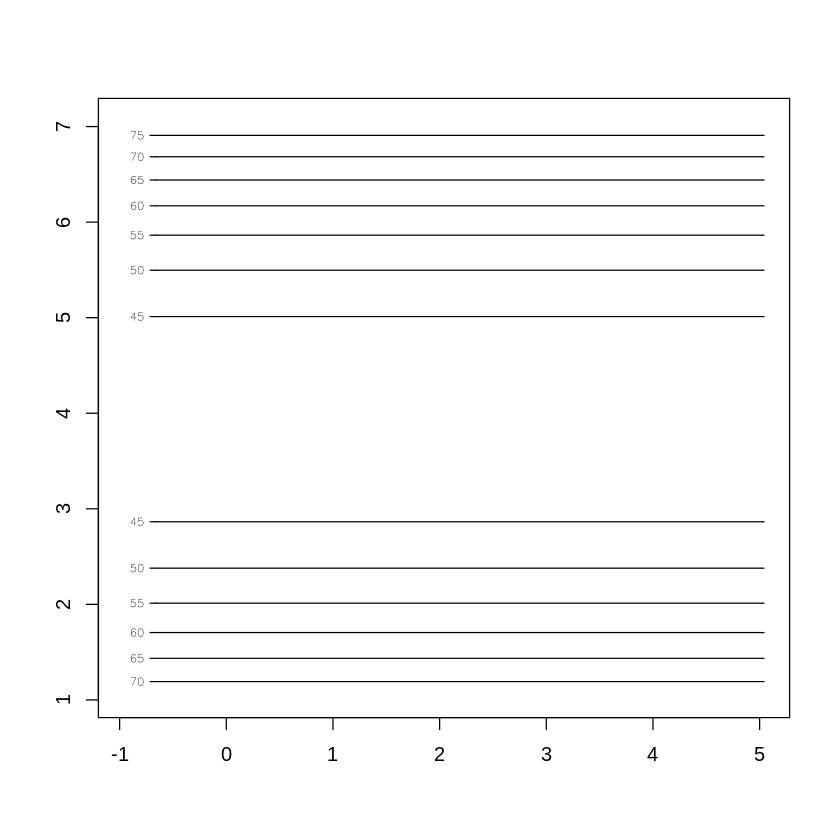

In [10]:
contour(b1.1212, b2.1212, RSS(lm.1212))

In [11]:
## 두 변수가 독립이 아닐 때 SSE[linear model1(x1, x3, 교호효과)]
## 모집단 가정(교호효과 o)
y = 2 * x1 + 4 * x3  + 3 * x1 * x3 + e
lm.1313 = lm(y ~ x1 + x3 + x1 * x3)
summary(lm.1313)

b1.1313 = lm.1313$coefficients[2]
b1.1313 = seq(b1.1313-5, b1.1313+5, length.out = 100)
b2.1313 = lm.1313$coefficients[3]
b2.1313 = seq(b2.1313-5, b2.1313+5, length.out = 100)


Call:
lm(formula = y ~ x1 + x3 + x1 * x3)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.80256 -0.67000  0.04812  0.64472  2.90504 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.09945    0.07205    1.38    0.168    
x1           2.12335    0.10645   19.95   <2e-16 ***
x3           3.96581    0.04977   79.69   <2e-16 ***
x1:x3        2.98881    0.01462  204.47   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9508 on 396 degrees of freedom
Multiple R-squared:  0.9969,	Adjusted R-squared:  0.9969 
F-statistic: 4.22e+04 on 3 and 396 DF,  p-value: < 2.2e-16


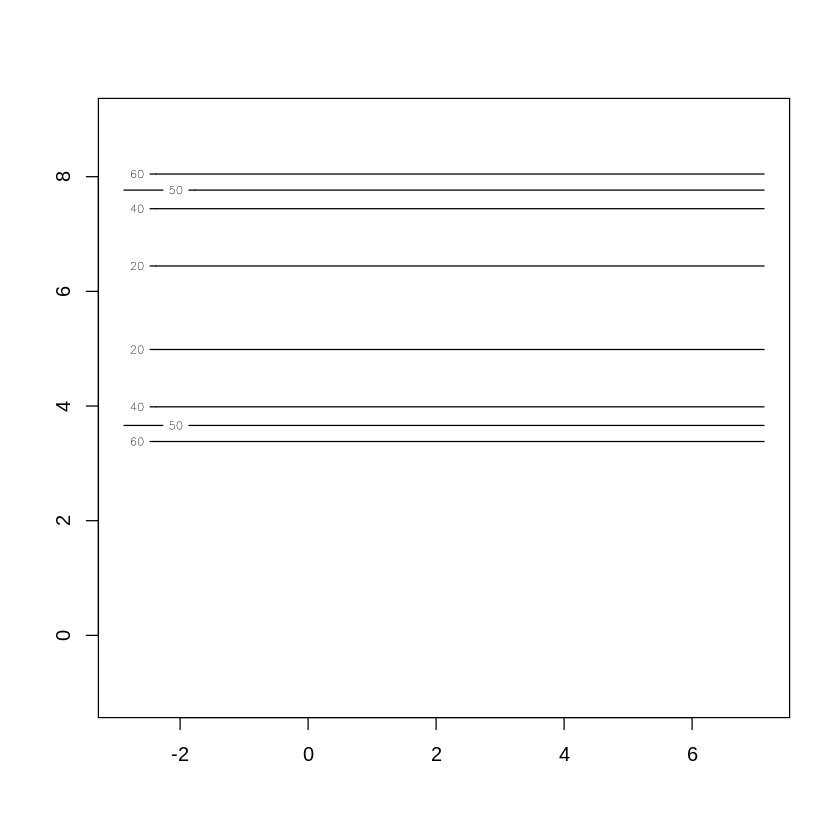

In [12]:
contour(b1.1313, b2.1313, RSS(lm.1313), levels = c(20, 40, 50, 60))

## 연속형 데이터

In [13]:
## 데이터 생성 [10개]
set.seed(1234)
x1 = rnorm(10, 0, 1)
x2 = rnorm(10, 0, 1)
x3 = 2 * x1 + rnorm(10, 1, 1)
e = rnorm(10, 0, 1)

[1] -0.1752832

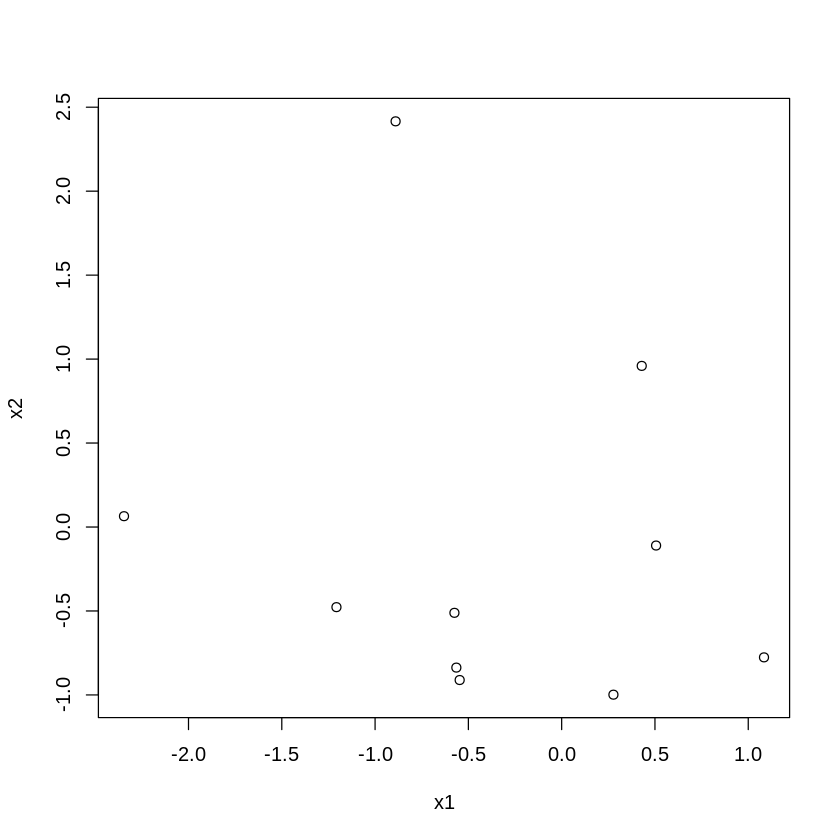

In [14]:
cor(x1, x2)
plot(x1, x2)

[1] 0.9462364

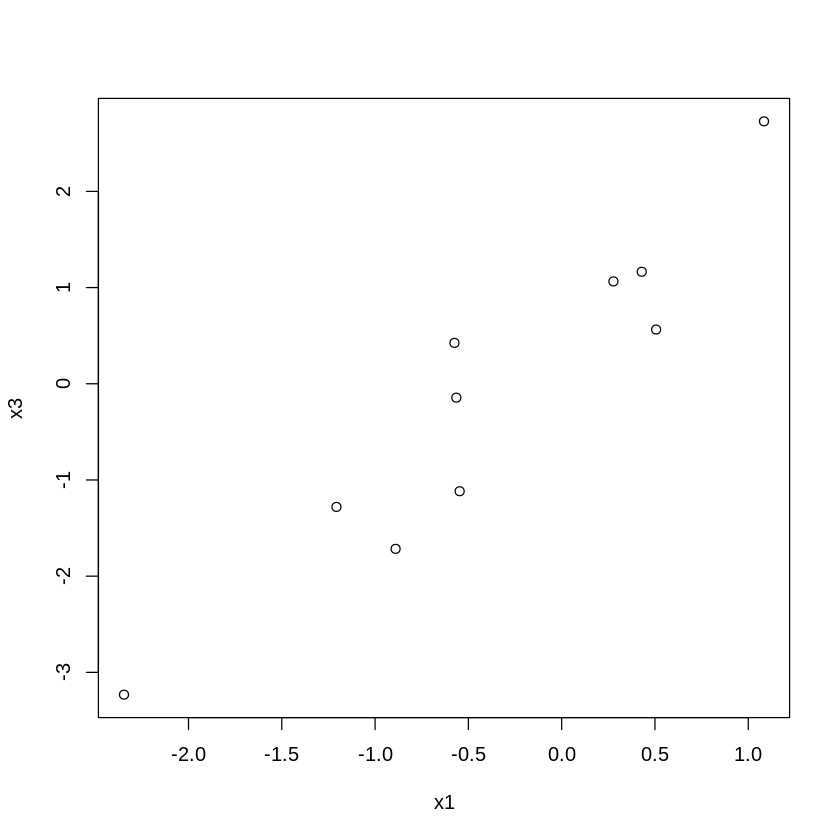

In [15]:
cor(x1, x3)
plot(x1, x3)

In [16]:
## 두 변수가 독립일 때 SSE[linear model1(x1, x2)]
## 모집단 가정
y = 2 * x1 + 4 * x2 + e
lm.12 = lm(y ~ x1 + x2)
summary(lm.12)

b1.12 = lm.12$coefficients[2]
b1.12 = seq(b1.12-3, b1.12+3, length.out = 100)
b2.12 = lm.12$coefficients[3]
b2.12 = seq(b2.12-3, b2.12+3, length.out = 100)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5121 -0.4632  0.1160  0.4092  1.5700 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.9005     0.3284  -2.742  0.02882 *  
x1            1.6783     0.3222   5.209  0.00124 ** 
x2            3.9068     0.3006  12.998 3.71e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9475 on 7 degrees of freedom
Multiple R-squared:  0.9621,	Adjusted R-squared:  0.9513 
F-statistic:  88.9 on 2 and 7 DF,  p-value: 1.058e-05


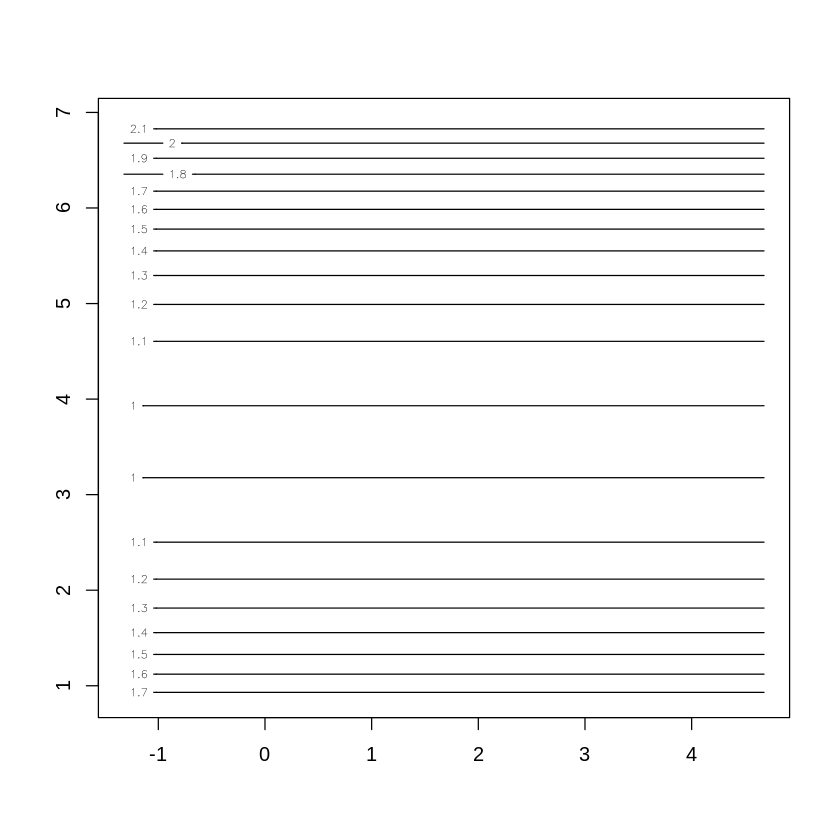

In [17]:
contour(b1.12, b2.12, RSS(lm.12))

In [18]:
## 두 변수가 독립이 아닐 때 SSE[linear model1(x1, x3)]
## 모집단 가정
y = 2 * x1 + 4 * x3 + e
lm.13 = lm(y ~ x1 + x3)
summary(lm.13)

b1.13 = lm.13$coefficients[2]
b1.13 = seq(b1.13-5, b1.13+5, length.out = 100)
b2.13 = lm.13$coefficients[3]
b2.13 = seq(b2.13-3, b2.13+3, length.out = 100)


Call:
lm(formula = y ~ x1 + x3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.42976 -0.54361 -0.02725  0.48153  1.62817 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.8604     0.4225  -2.037 0.081106 .  
x1            1.7732     0.9868   1.797 0.115389    
x3            3.9525     0.5728   6.901 0.000231 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9536 on 7 degrees of freedom
Multiple R-squared:  0.9902,	Adjusted R-squared:  0.9875 
F-statistic: 355.1 on 2 and 7 DF,  p-value: 9.183e-08


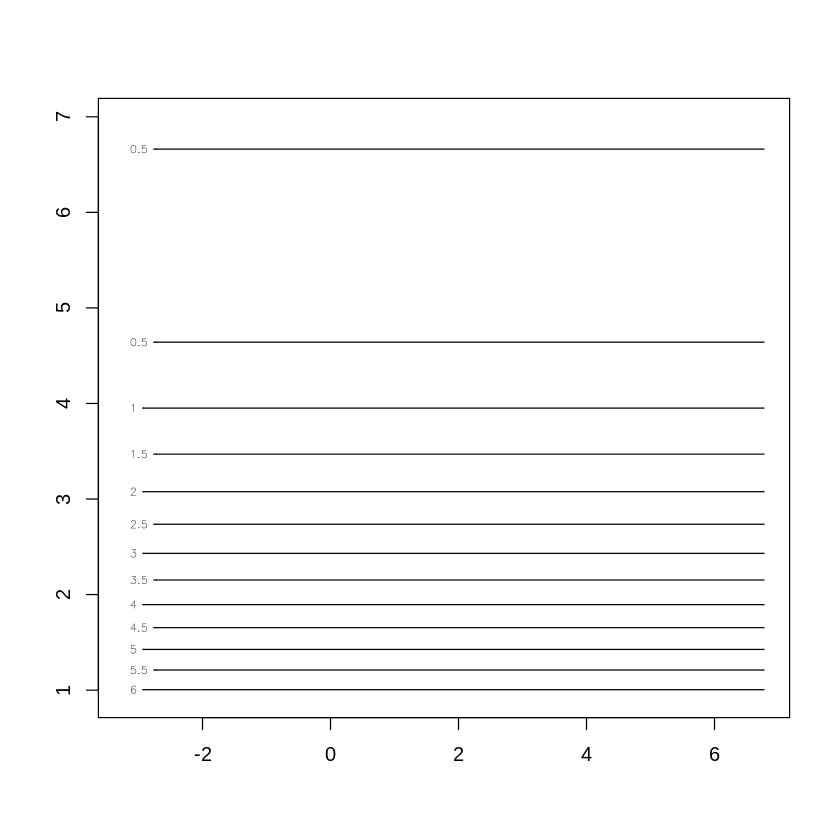

In [19]:
contour(b1.13, b2.13, RSS(lm.13))

In [20]:
## 두 변수가 독립이 아닐 때 SSE[linear model1(x1, x3, 교호효과)]
## 모집단 가정(교호효과 o)
y = 2 * x1 + 4 * x3  + 3 * x1 * x3 + e
lm.1313 = lm(y ~ x1 + x3 + x1 * x3)
summary(lm.1313)

b1.1313 = lm.1313$coefficients[2]
b1.1313 = seq(b1.1313-5, b1.1313+5, length.out = 100)
b2.1313 = lm.1313$coefficients[3]
b2.1313 = seq(b2.1313-3, b2.1313+3, length.out = 100)


Call:
lm(formula = y ~ x1 + x3 + x1 * x3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.32378 -0.58274 -0.02054  0.47888  1.68052 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.9012     0.4796  -1.879 0.109286    
x1            1.8569     1.1068   1.678 0.144398    
x3            3.9390     0.6173   6.381 0.000696 ***
x1:x3         3.0467     0.1781  17.105 2.55e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.024 on 6 degrees of freedom
Multiple R-squared:  0.9883,	Adjusted R-squared:  0.9825 
F-statistic: 169.2 on 3 and 6 DF,  p-value: 3.47e-06


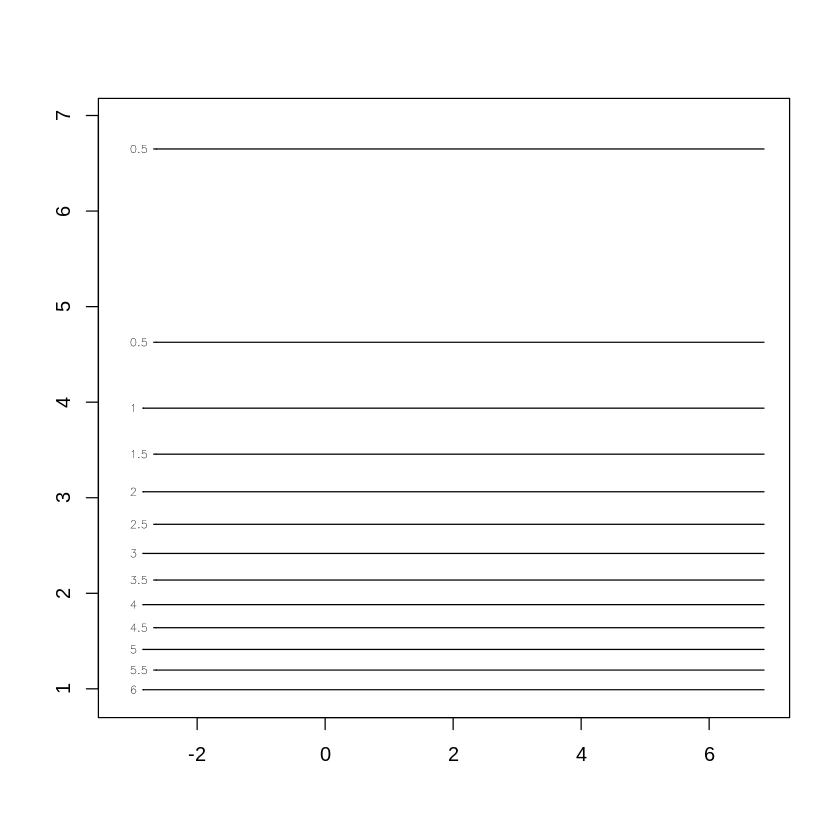

In [21]:
contour(b1.1313, b2.1313, RSS(lm.1313))